In [1]:
import pandas as pd
import nltk
import regex as re
import matplotlib.pyplot as plt

In [26]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_eu_cleaned.csv")

In [27]:
data.shape

(45426, 4)

In [28]:
data['content'][5]

'@bbclysedoucet With those living on the flood plane is would seem to be a task that is one that cannot be achieved without a major reorganisation with a few billion dollars, can it be done in stages or has the pendulum of global warming gone too far?'

# Data Exploration

In [29]:
# checking duplicates if there are retweets
data['content'].duplicated().sum()


222

In [30]:
# dropping duplicate tweets based on Text coloumn
data = data.drop_duplicates(subset=['content'], keep='first')

In [31]:
data.shape

(45204, 4)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45204 entries, 0 to 45425
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  45204 non-null  object
 1   place    45204 non-null  object
 2   year     45204 non-null  int64 
 3   month    45204 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


# Text preprocessing

In [33]:
# converting text into lower case
data['content'] = data['content'].str.lower()

In [34]:
# removing twitter mentions(@, #, punctuations) from the tweets
data['content'] = data['content'].str.replace("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', regex = True)

In [35]:
# removing hyperlinks from the tweets
data['content'] = data['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',regex = True)

In [36]:
data['content'][4]

'twitters climate doomers who waste their days telling us about the inevitability the coming global warming apocalypse remind me of the defund the police crew when you start quizzing them about it they go well i dont mean that kind of apocalypse unserious people'

In [37]:
# emoji removal
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,content,place,year,month
0,going through multiple reports on co2 emission...,eu,2022,August
1,last year it didnt get to be fall weather unti...,eu,2022,August
2,global warming this shouldnt,eu,2022,August
3,yess change of season only in name pre global ...,eu,2022,August
4,twitters climate doomers who waste their days ...,eu,2022,August
...,...,...,...,...
45421,no that wasnt global warming is her fault an...,eu,2010,July
45422,recordheat does not prove global warming,eu,2010,July
45423,every problem in universe comes with builtin s...,eu,2010,July
45424,after watching mayan prophecy movie im more co...,eu,2010,May


In [38]:
data['content'][3]

'yess change of season only in name pre global warming schedule i guess  got me discounted cute little table for  house and now tramming it there '

In [39]:
#tweets_combined.to_csv("combine_tweet_2019_2022(with_stopwords).csv",index = False)

In [40]:
# removing stopwords using ntlk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop = (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# adding stop words to the existing list
new_stopwords = ["isnt", "dont", "maam", "according", "u", "climate change", "global warming", "know","climate", "change", "warming","global","say", "go", "use", "said", "warmingchange", "warmingclimate","changeglobal","warming change", "thats","us", "see","via","may"]
stop.extend(new_stopwords)

In [42]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
# removing stopwords
data['content']  = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [44]:
data.head()

,content,place,year,month
0,going multiple reports co2 emissions seeing cu...,eu,2022,August
1,last year didnt get fall weather late november...,eu,2022,August
2,shouldnt,eu,2022,August
3,yess season name pre schedule guess got discou...,eu,2022,August
4,twitters doomers waste days telling inevitabil...,eu,2022,August


In [45]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
data['content_token'] = data['content'].apply(word_tokenize)

In [47]:
data

,content,place,year,month,content_token
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"[going, multiple, reports, co2, emissions, see..."
1,last year didnt get fall weather late november...,eu,2022,August,"[last, year, didnt, get, fall, weather, late, ..."
2,shouldnt,eu,2022,August,[shouldnt]
3,yess season name pre schedule guess got discou...,eu,2022,August,"[yess, season, name, pre, schedule, guess, got..."
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"[twitters, doomers, waste, days, telling, inev..."
...,...,...,...,...,...
45421,wasnt fault mps expenses claims aswell porn,eu,2010,July,"[wasnt, fault, mps, expenses, claims, aswell, ..."
45422,recordheat prove,eu,2010,July,"[recordheat, prove]"
45423,every problem universe comes builtin solution ...,eu,2010,July,"[every, problem, universe, comes, builtin, sol..."
45424,watching mayan prophecy movie im convinced not...,eu,2010,May,"[watching, mayan, prophecy, movie, im, convinc..."


In [51]:
data.to_csv("data_eu_cleaned_tokenized.csv", index = False)

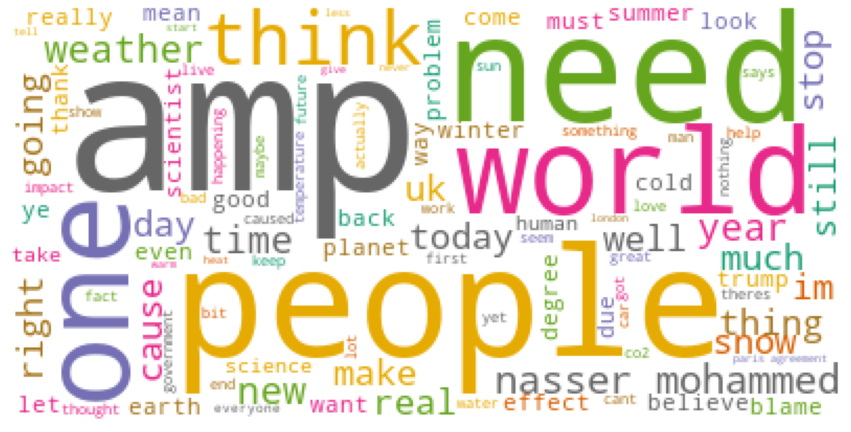

In [50]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

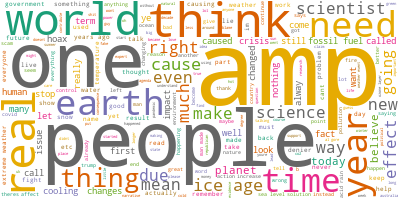

In [466]:
wordcloud.to_image()